# Сборный проект №1

**Описание проекта**

В наши дни игровая индустрия сформировалась в полноценную нишу развлечений для людей всех возрастов и групп. Среди различных способов распространения лицензионных копий игр на данный момент преобладают онлайн магазины. На примере данных интернет-магазина «Стримчик» и открытых источников попробуем определить закономерности успеха игр. Для этого проанализируем данные за 2016-й год и спрогнозируем план крекламной компании на 2017-й.

**Цель исследования**

Выявить определяющие успешность игры закономерности с целью планирования рекламной компании.

**Ход исследования:**
- Подготовка данных: загрузка и изучение общей информации из представленного датасета.
- Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий, подсчёт суммарных продаж.
- Исследовательский анализ данных: оценка продаж за разные годы, по разным платформам, распределение по жанрам.
- Составление портрета пользователя каждого региона: популярные платформы, жанры, влияние рейтинга ESRB.
- Проверка гипотез: средние рейтинги платформ и жанров.

**Общий вывод:** Резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.
    
С помощью данного исследования мы пытаемся выявить определяющие успешность игры закономерности с целью планирования рекламной компании, что поможет развивать интернет-магазина «Стримчик» в будущем.

In [1]:
import pandas as pd # импортируем необходимые бибилотеки
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import numpy as np

### Изучение общей информации о датасете.

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10) # выведем первые 10 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info() # выведем информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучив общую информацию о представленном датафрейме, можно отметить что:
- датафрейм имеет достаточный и удобный для анализа размер (16715 строчек);
- название колонок не приведены к нижнему регистру;
- тип данных для столбца Year_of_Release имеет некорректный формат float64 (необходим int64);
- тип данных для столбца User_Score имеет некорректный формат object (необходим float64)
- в столбцах с оценками и рейтингом игр наблюдается большое количество пропусков (от трети до половины от общего числа значений).

### Предобработка данных.

In [5]:
df.columns = df.columns.str.lower() # приведём названия столбцов к нижнему регистру
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
df.duplicated().sum() # проверим датафрейм на явные дубликаты

0

Оценим количество неявных дубликатов, найдя полное совпадение по имени проекта, платформе, году релиза и жанру (зачастую проекты выходят на разных платформах и имеют различающиеся рейтинги, поэтому будем считать выходы на новых платформах отдельной игрой).

In [7]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release','genre'], keep = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [8]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release','genre']).reset_index(drop=True) #уберем неявные дубликаты

Оценим уникальные значения с столбце year_of_release. 

In [9]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
df['year_of_release'].isna().sum()

269

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

Так как в столбце year_of_release имеются незначительное количество пропусков - около 1.5%, мы можем их удалить для преобразования типа данных в стобце с годом релиза.

In [12]:
df['year_of_release'] = df['year_of_release'].astype(int)

Стоит отметить, что есть два пропуска данных в значениях названия игр и их жанра. Выясним, не совпадают ли проекты по этим пропускам. Если проекты совпадут, то удалим две строки из датафрейма, так как это не сильно повлияет на общий объём данных.

In [13]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [14]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


In [15]:
df = df.dropna(subset=['name', 'genre']) # удалим две строки с проектами без названия и жанра
len(df) # проверим результат

16443

Преобразуем тип данных в стобце user_score, перед этим проверив уникальные значения в этом столбце.

In [16]:
df['user_score'].unique() # посмотрим уникальные значения в столбце перед преобразованием типов данных

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных оценки пользователей можно заметить аббревиатуру 'tbd'. Она помешает преобразованию. Оценим сколько раз встречается данное значение.

In [17]:
len(df.loc[df['user_score'] == 'tbd'])

2376

Доля строк со значением 'tbd' в столбце с оценкой пользователя достаточно большая, поэтому просто преобразуем тип данных (не удаляя), меняя tbd на Nan параметром errors='coerce'.

In [18]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') 

In [19]:
df.dtypes # проверим преобразование

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Так как данные в столбце rating имеют тип object, и в этом столбце наблюдается большое количество пропусков, мы можем заполнить их значением 'empty'. 

In [20]:
df['rating'] = df['rating'].fillna('empty')
df['rating'].unique()

array(['E', 'empty', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Данные в столбцах с оценкой пользователей и критиков имеют большое количество пропусков (6699 и 8576 соответсвенно). Заполнять их средним или медианным значением было бы некорректно, так как оценка проектов имеет порой достаточно сильный разброс значений, и в большинстве своём, преобладают проекты с более низким рейтингом.

Добавим в датафрейм столбец с суммарными продажами по регионам.

In [21]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head() # проверим результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,empty,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,empty,31.38


Таким образом, изучив данные, стоит отметить, что:
- в первоначальном датафрейме было обнаружено два проекта без названия и жанра, строчки с данными по ним были исключены, что практически не повлияло на общую выборку;
- был преобразован тип данных для столбца user_score из object во float с заменой значений 'tbd' на Nan, это позволит корректно работать с данными в дальнейшем;
- пропущенные значения в столбце rating были заменены значением empty, это позволит далее работать со столбцом, имеющим общий тип данный object;
- из-за большого количества пропусков в столбцах с оценками критиков и пользователей, а также особенностью распределния оценок у разных проектов, было решено оставить пропущенные значения в датафрейме без изменений;
- был добавлен столбец с общим количеством продаж в трёх регионах.

### Исследовательский анализ данных.

#### Количество выпускаемых игр по годам.

In [22]:
df.groupby('year_of_release', as_index=False)['name'].count() #оценим количество выпускаемых игр по годам

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


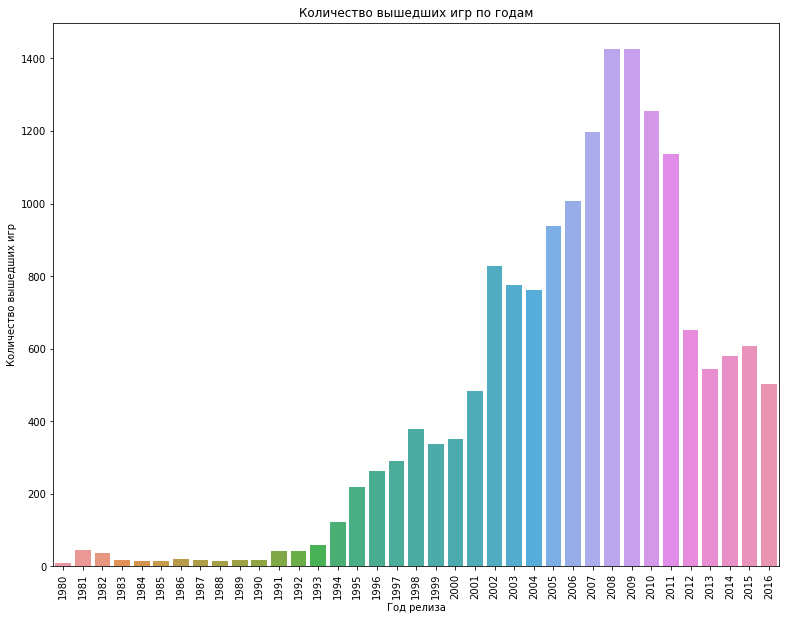

In [23]:
fig, axs = plt.subplots(figsize=(13, 10)) # зададим размер поля для построений
sns.barplot( # построим столбчатую диаграмму чтоб визуализировать количество вышедших проектов по годам релиза
    data=df.groupby('year_of_release', as_index=False)['name'].count(), 
    x="year_of_release", 
    y="name"
).set(
    xlabel='Год релиза',
    ylabel='Количество вышедших игр', 
    title='Количество вышедших игр по годам'
)
plt.xticks(rotation=90)
plt.show()

Из полученных данных можно сделать вывод, что наибольший интерес представляет период с 1994 года. В это время выпускалось более 100 игр в год.

#### Изменение продаж игр по платформам.

In [24]:
sales_by_platform = df.query('year_of_release > 1993').groupby('platform', as_index=False).agg(
    {'sum_sales':['count', 'sum']}
    ) # начиная с 1994-го года, сгруппируем платформе, посчитаем сумму и кол-во продаж
sales_by_platform.columns = sales_by_platform.columns.map('_'.join) #избавимся от мультииндекса и переименуем столбцы, убрав "_"
sales_by_platform = sales_by_platform.rename(columns={'platform_': 'platform'})
sales_by_platform.head(10)

,platform,sum_sales_count,sum_sales_sum
0,3DO,3,0.10
1,3DS,512,257.81
2,DC,52,15.95
3,DS,2120,802.76
4,GB,67,152.08
5,GBA,811,312.88
6,GC,542,196.73
7,GEN,12,8.13
8,N64,316,218.01
9,NES,1,0.11


Отсортируем полученный датафрейм по убыванию сумарных продаж по платформам, чтобы понять самые популярные платформы за последние годы.

In [25]:
sales_by_platform.sort_values(by='platform', ascending=False).head(20)

,platform,sum_sales_count,sum_sales_sum
28,XOne,247,159.32
27,XB,803,251.57
26,X360,1232,961.24
25,WiiU,147,82.19
24,Wii,1286,891.18
23,WS,6,1.42
22,TG16,2,0.16
21,SNES,144,84.67
20,SCD,5,0.36
19,SAT,173,33.59


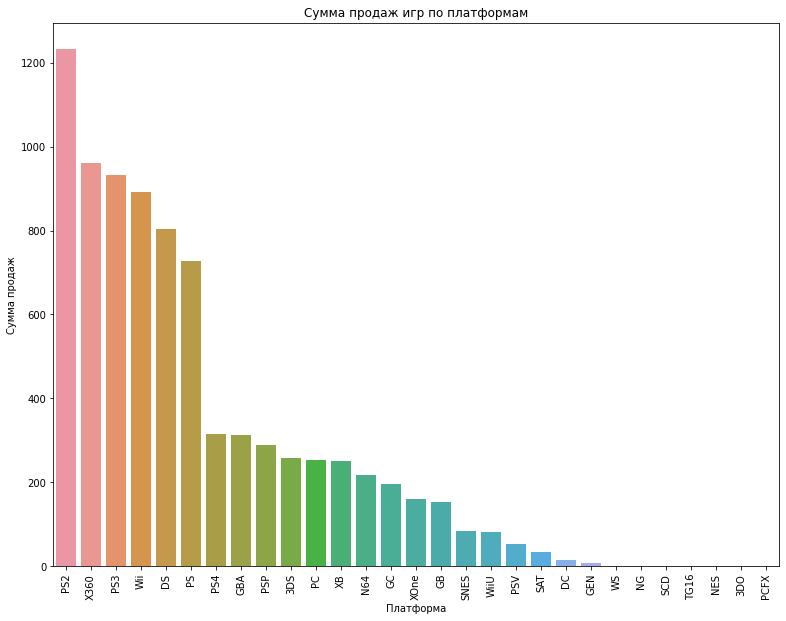

In [26]:
fig, axs = plt.subplots(figsize=(13, 10))
sns.barplot( # построим столбчатую диаграмму чтоб визуализировать сумму продаж проектов по платформам
    data=sales_by_platform.sort_values(by='sum_sales_sum', ascending=False), 
    x="platform", 
    y="sum_sales_sum",
).set(
    xlabel='Платформа', 
    ylabel='Сумма продаж', 
    title='Сумма продаж игр по платформам',
)
plt.xticks(rotation=90)
plt.show()

Список наиболее популярных платформ по общим суммам продаж за период с 1994 года можно сформировать из следующих устройств: Wii, PS2, PS, X360, DS, PS3, PS4.

In [27]:
sales_by_platform = df.query('year_of_release > 1993').groupby(['year_of_release', 'platform'], as_index=False).agg(
    {'sum_sales':['count', 'sum']}
    ) # перезапишем датафрейм, теперь с группировкой по годам для построение следующего графика
sales_by_platform.columns = sales_by_platform.columns.map('_'.join) #избавимся от мультииндекса и переименуем столбцы, убрав "_"
sales_by_platform = sales_by_platform.rename(columns={'year_of_release_':'year_of_release', 'platform_': 'platform'})
sales_by_platform.head(10)

,year_of_release,platform,sum_sales_count,sum_sales_sum
0,1994,3DO,1,0.02
1,1994,GB,3,12.18
2,1994,GEN,12,8.13
3,1994,NES,1,0.11
4,1994,NG,4,0.80
5,1994,PC,6,12.87
6,1994,PS,17,6.03
7,1994,SAT,19,3.65
8,1994,SCD,5,0.36
9,1994,SNES,53,35.08


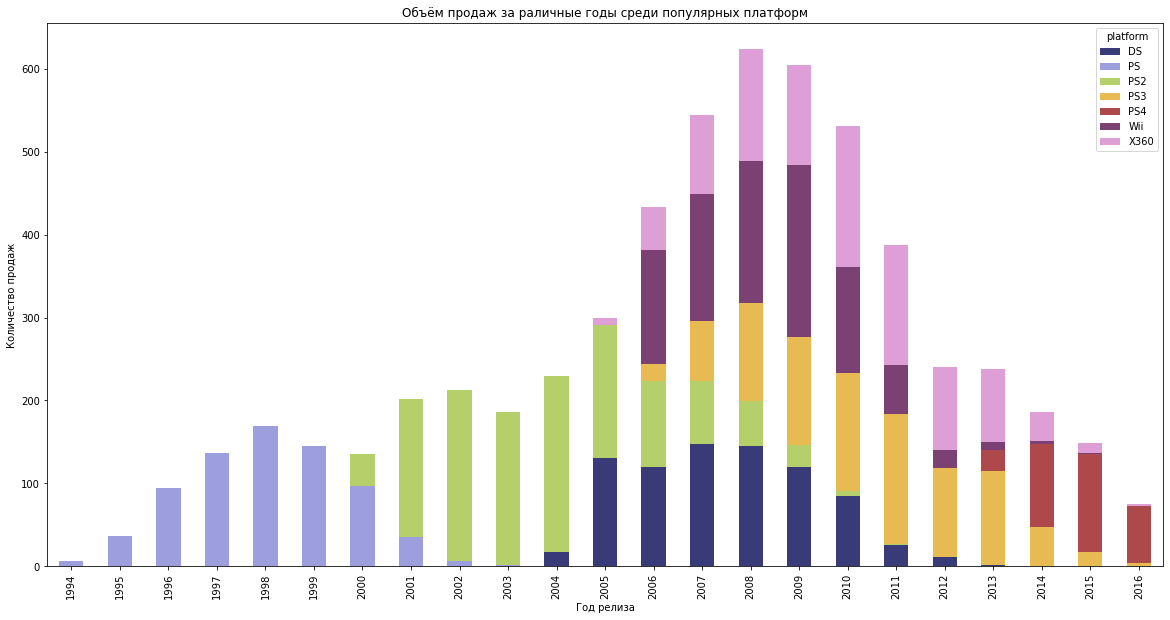

In [28]:
pivot_sales = sales_by_platform.query('platform in ["Wii", "PS2", "PS", "X360", "DS", "PS3", "PS4"]')
pd.pivot_table(pivot_sales, values='sum_sales_sum', index='year_of_release', columns='platform').plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    colormap="tab20b").set(
    xlabel='Год релиза', 
    ylabel='Количество продаж', 
    title='Объём продаж за раличные годы среди популярных платформ'
)
plt.show()

Сделаем табличку, чтобы более наглядно определить жизненный срок платформы. Сделаем фильтр по интересующим нас платформам, сгруппируем по платформе, найдём минимальное и максимальное значение года, а затем разницу.

In [29]:
lifespan_platform = df.query('platform in ["Wii", "PS2", "PS", "X360", "DS", "PS3", "PS4"]').groupby(
    ['platform'], as_index=False).agg(
    {'year_of_release':['min', 'max']}
    )
lifespan_platform.columns = lifespan_platform.columns.map('_'.join)
lifespan_platform = lifespan_platform.rename(columns={'platform_':'platform'})
lifespan_platform['year_difference'] = lifespan_platform['year_of_release_max'] - lifespan_platform['year_of_release_min']
lifespan_platform

,platform,year_of_release_min,year_of_release_max,year_difference
0,DS,1985,2013,28
1,PS,1994,2003,9
2,PS2,2000,2011,11
3,PS3,2006,2016,10
4,PS4,2013,2016,3
5,Wii,2006,2016,10
6,X360,2005,2016,11


Таким образом получается, что  средний срок жизни платформы - 9-11 лет на выбранном временном промежутке. Для PS4 мы получили маленькое значение лет, так как эта платформа является новой.

Проанализировав построенные графики, можно сделать вывод что новые платформы появляются и исчезают примерно раз в 7-8 лет.

#### Выделение актуального периода времени.

Сделаем срез по наиболее актуальному периоду, в который войдут платформы, лидирующие в последние годы. Это поможет нам сделать прогноз на 2017 год. Возьмём данные, начиная с 2013 года (года выхода новых поколений консолей - ps4 и xbox one).

In [30]:
df_filtred = df.query('year_of_release > 2012')
print(f'Количество строк в датафрейме с актуальными данными: {len(df_filtred)}')
df_filtred.head()

Количество строк в датафрейме с актуальными данными: 2233


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


#### Лидеры продаж среди платформ.

Оценим, какие платформы лидируют по продажам. Выберем несколько потенциально прибыльных платформ.

In [31]:
df_filtred.groupby('platform')['sum_sales'].sum().sort_values(ascending=False) # сгруппируем по платформе, посчитаем продажи
                                                                                # и отсортируем по убыванию

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: sum_sales, dtype: float64

Наибольшие продажи мы видим у платформ: PS4, PS3, XOne, 3DS, X360. Оценим, растут или падают продажи у каждой платформы за выбранный период.

In [32]:
df_filtred_2 = df_filtred.query(
    'platform in ["PS4", "PS3", "XOne", "3DS", "X360"]'
).groupby(['year_of_release', 'platform'], as_index=False)['sum_sales'].sum() #создадим ещё один датафреймвзяв только популярные 
df_filtred_2.sort_values(by=['year_of_release', 'sum_sales'], ascending=False) # платформы

,year_of_release,platform,sum_sales
17,2016,PS4,69.25
19,2016,XOne,26.15
15,2016,3DS,15.14
16,2016,PS3,3.60
18,2016,X360,1.52
12,2015,PS4,118.90
14,2015,XOne,60.14
10,2015,3DS,27.78
11,2015,PS3,16.82
13,2015,X360,11.96


За последний рассмотренный год продажи по всем платформам снизились примерно одинаково. Тем не менее, до 2016 года, наблюдался рост продаж на новых платформах: PS4, XOne. Их можно назвать наиболее преспективными.

#### Диаграмма размаха глобальных продаж игр в разбивке по платформам. 

Построим график по глобальным продажам игр в разбивке по платформам.

In [33]:
df_filtred['sum_sales'].describe() # для начала опишем данные с толбце с суммой продаж

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: sum_sales, dtype: float64

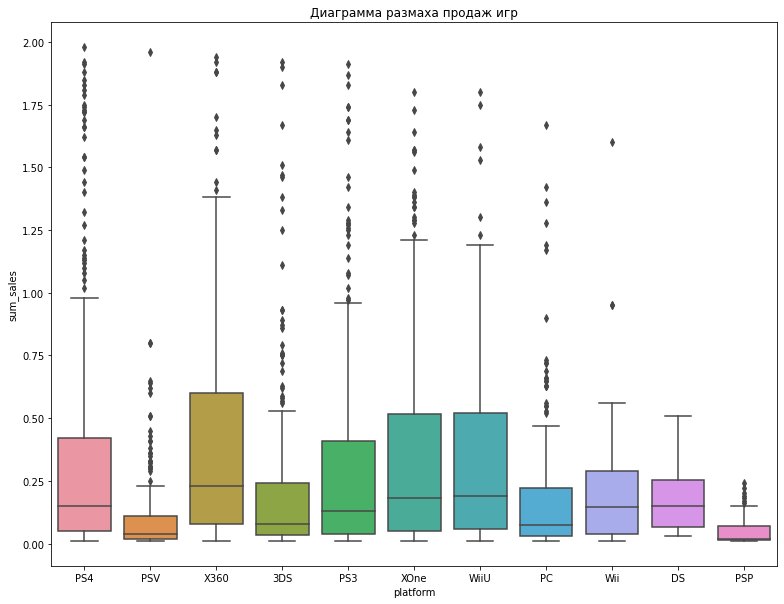

In [34]:
fig, axs = plt.subplots(figsize=(13, 10))
sns.boxplot(x="platform", y="sum_sales", # построим диаграмму размаха
            data=df_filtred.query('sum_sales < 2')).set(title = "Диаграмма размаха продаж игр")
plt.show()

Теперь отобразим диаграммы размаха без фильтра, чтобы оценить общее количество выбросов.

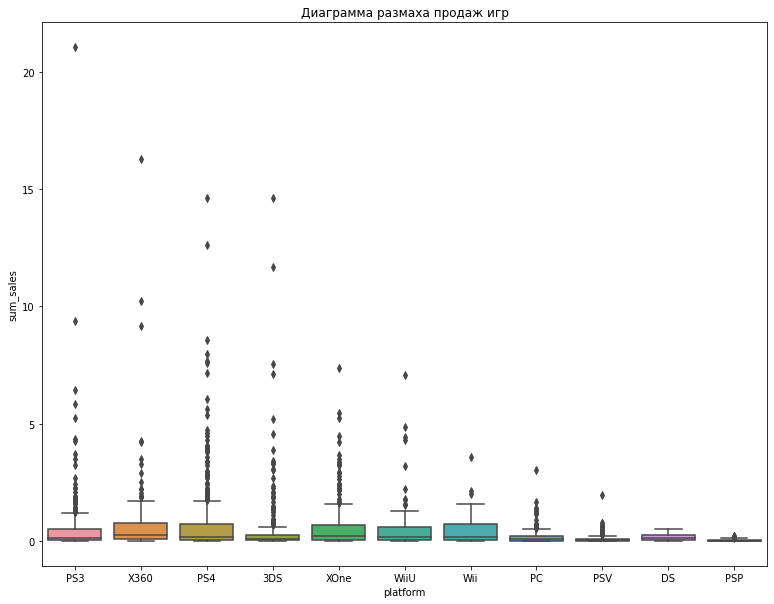

In [35]:
fig, axs = plt.subplots(figsize=(13, 10))
sns.boxplot(x="platform", y="sum_sales", # построим диаграмму размаха
            data=df_filtred).set(title = "Диаграмма размаха продаж игр")
plt.show()

Посмотрим, что за игры имеют продажи больше 10 миллионов проданных копий.

In [36]:
df_filtred.query('sum_sales > 10') # сделаем фильтр

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,empty,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


Получается, что за выбросами из данных стоят высокооценнённые игры от знаменитых студий. Отсюда высокий показатель продаж.

Диаграмма размаха подтвердила, что наилучший показатель продаж среди платформ аткуального периода принадлежит X360, XOne, WiiU и PS4. Также медианное значение продаж на этих платформах расположено выше, чем у остальных платформ. На диаграммах было выявлено большое количество выбросов, связанных с высокими продажами наиболее популярных игр.

#### Влияние отзывов на продажи игр.

Оценим влияние отзывов на продажи внутри популярной платформы - PS4.

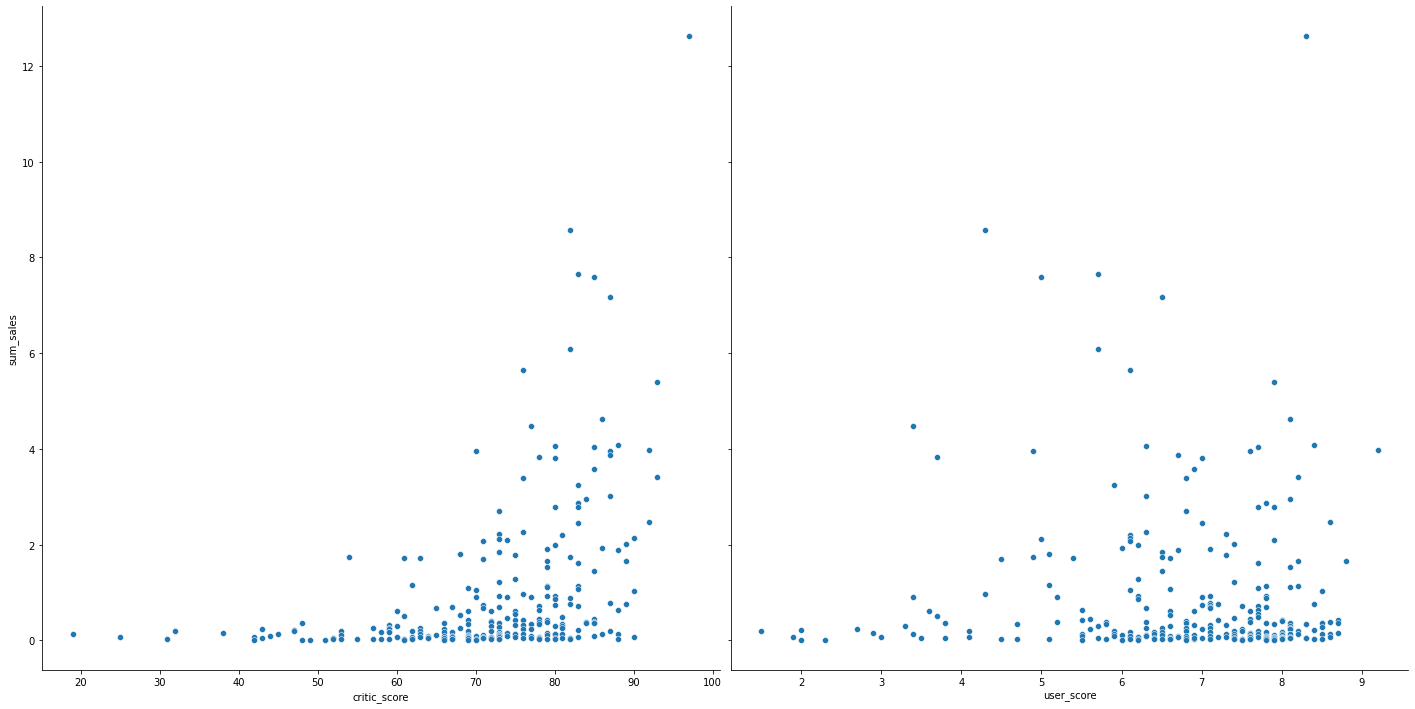

In [37]:
sns.pairplot(df_filtred.query('platform == "PS4"'), x_vars=['critic_score', 'user_score'], y_vars='sum_sales', height=10)
plt.show() # построим диаграмму рассеивания для зависимости суммы продаж на PS4 от оценок сразу для двух столбцов с оценками 

In [38]:
df_filtred.query('platform == "PS4"')[['critic_score', 'user_score', 'sum_sales']].corr().iloc[[2]] #выведем коэффициенты 
                                                                                                    #корреляции

,critic_score,user_score,sum_sales
sum_sales,0.406568,-0.031957,1.0


Построенные графики и коэффициент корреляции показали, что:
- между оценками пользователей и продажами практически нет зависимости;
- наблюдается слабая прямая зависимость между оценками критиков и продажами (коэффициент корреляции порядка 0.4).

Рассмотрим другие популярные платформы и проведём сравнение.

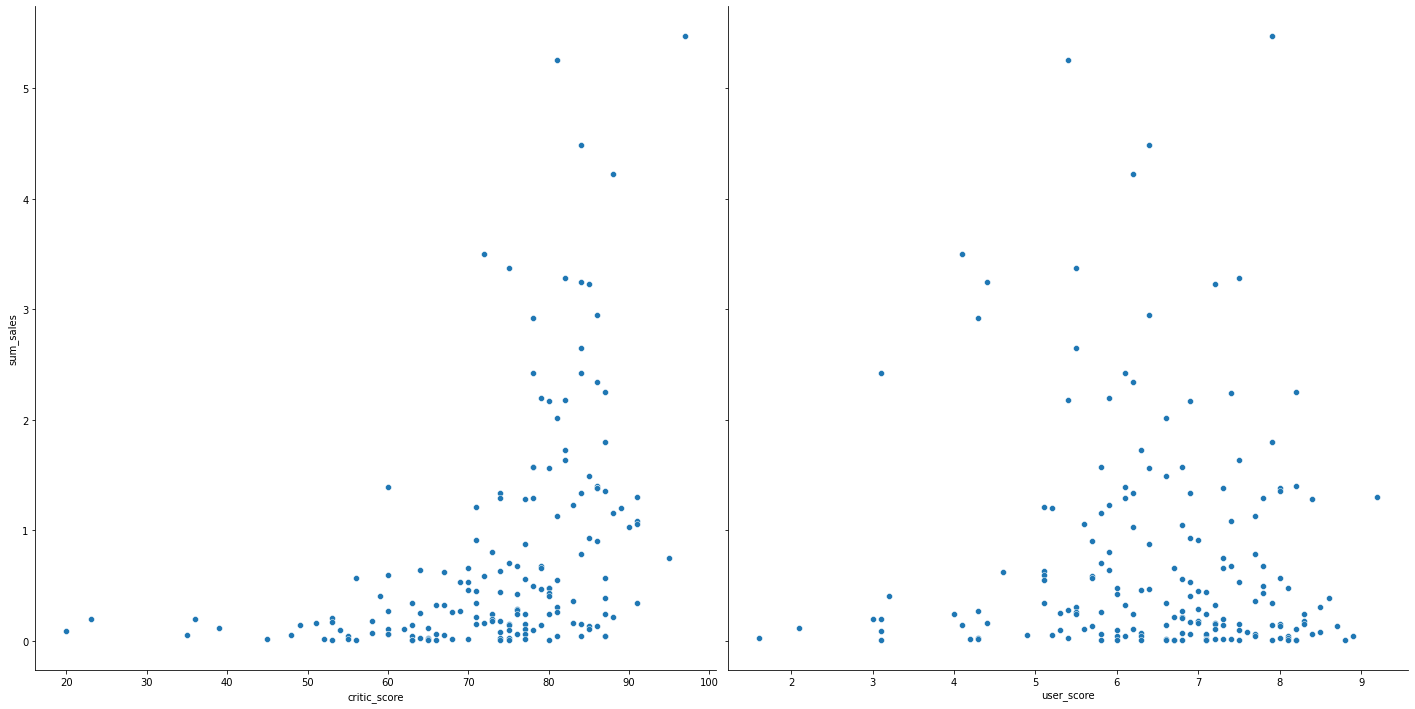

In [39]:
sns.pairplot(df_filtred.query('platform == "XOne"'), x_vars=['critic_score', 'user_score'], y_vars='sum_sales', height=10)
plt.show() # построим диаграмму рассеивания для зависимости суммы продаж на XOne от оценок сразу для двух столбцов с оценками 

In [40]:
df_filtred.query('platform == "XOne"')[['critic_score', 'user_score', 'sum_sales']].corr().iloc[[2]] #выведем коэффициенты 
                                                                                                    #корреляции

,critic_score,user_score,sum_sales
sum_sales,0.416998,-0.068925,1.0


Для платформы XOne наблюдается такая же слабая зависимость между продажами и оценкой критиков (коэффициент корреляции порядка 0.4). С оценкой пользователей продажи очень слабо коррелируют.

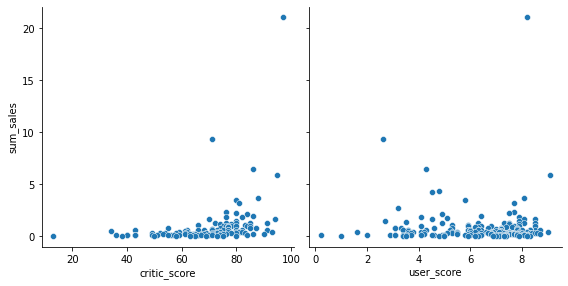

In [41]:
sns.pairplot(df_filtred.query('platform == "PS3"'), x_vars=['critic_score', 'user_score'], y_vars='sum_sales', height=4)
plt.show() # построим диаграмму рассеивания для зависимости суммы продаж на PS3 от оценок сразу для двух столбцов с оценками 

In [42]:
df_filtred.query('platform == "PS3"')[['critic_score', 'user_score', 'sum_sales']].corr().iloc[[2]] #выведем коэффициенты 
                                                                                                    #корреляции

,critic_score,user_score,sum_sales
sum_sales,0.334285,0.002394,1.0


Для PS3 наблюдается слабая прямая корреляция между продажами и оценкой критиков (коэффциент около 0.33), для оценок пользователей зависиимость очень слабая.

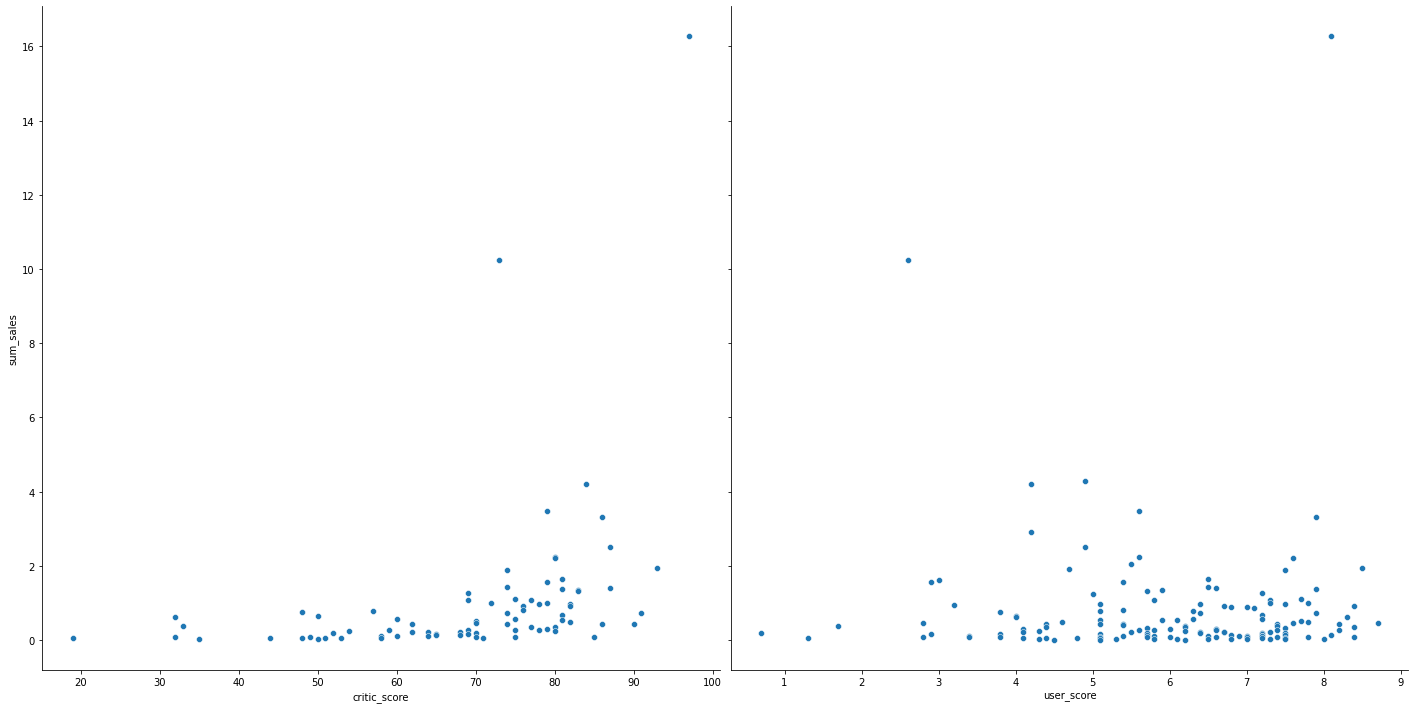

In [43]:
sns.pairplot(df_filtred.query('platform == "X360"'), x_vars=['critic_score', 'user_score'], y_vars='sum_sales', height=10)
# построим диаграмму рассеивания сразу для двух столбцов с оценками 

In [44]:
df_filtred.query('platform == "X360"')[['critic_score', 'user_score', 'sum_sales']].corr().iloc[[2]] #выведем коэффициенты 
                                                                                                    #корреляции

,critic_score,user_score,sum_sales
sum_sales,0.350345,-0.011742,1.0


Для X360 наблюдается такая же закономерность, как и для предыдущих случаев - слабая прямая зависимость для оценок критиков и очень слабая для оценок пользователей. 

Таким образом, для платформ зависимость продаж игр от оценок критиков проявляется слабо, для оценок пользователей - очень слабо. Если использовать эту корреляцию для каких-то решений, стоит рассматривать только оценки критиков. 

#### Общее распределение игр по жанрам.

 Изучим распределение игр по жанрам и оценим влияние жанра на продаваемость игры.

In [45]:
df_filtred['genre'].nunique() # выведем количество уникальных жанров

12

In [46]:
df_filtred.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [47]:
pd.pivot_table(df_filtred, values='sum_sales', index='genre')

,sum_sales
genre,
Action,0.420196
Adventure,0.096490
Fighting,0.441375
Misc,0.405290
Platform,0.576081
Puzzle,0.186471
Racing,0.469294
Role-Playing,0.499623
Shooter,1.245882


In [48]:
groupby_genre = df_filtred.groupby('genre', as_index=False).agg({'sum_sales':['count', 'median']})
groupby_genre.columns = groupby_genre.columns.map('_'.join)
groupby_genre = groupby_genre.rename(columns={'genre_':'genre'})
groupby_genre.sort_values(by='sum_sales_count', ascending=False)

,genre,sum_sales_count,sum_sales_median
0,Action,766,0.110
7,Role-Playing,292,0.125
1,Adventure,245,0.030
10,Sports,214,0.240
8,Shooter,187,0.450
3,Misc,155,0.100
6,Racing,85,0.120
2,Fighting,80,0.125
4,Platform,74,0.225
9,Simulation,62,0.100


Наибольшее количество проектов можно выделить среди следующих жанров: Action, Role-Playing, Adventure, Sports.

In [49]:
groupby_genre = groupby_genre.sort_values(by='sum_sales_median', ascending=False)
groupby_genre

,genre,sum_sales_count,sum_sales_median
8,Shooter,187,0.450
10,Sports,214,0.240
4,Platform,74,0.225
7,Role-Playing,292,0.125
2,Fighting,80,0.125
6,Racing,85,0.120
0,Action,766,0.110
9,Simulation,62,0.100
3,Misc,155,0.100
11,Strategy,56,0.080


В топ самых продаваемых жанров входят: Shooter, Sports, Platform.

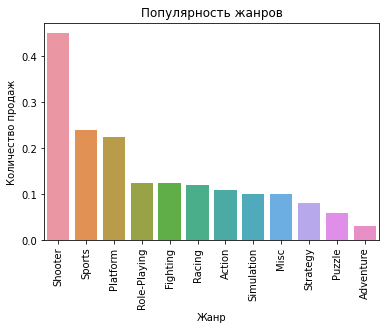

In [50]:
plt.xticks(rotation=90) # повернем подписи для оси х
ax = sns.barplot(
    data=groupby_genre, 
    x="genre", 
    y="sum_sales_median"
).set(
    xlabel='Жанр', 
    ylabel='Количество продаж', 
    title='Популярность жанров'
)

Таким образом, отметим что:
- больше всего игр продаётся среди следующих жанров: Action, Role-Playing, Adventure, Sports;
- самыми прибыльными жанрами являются Shooter, Sports, Platform.

### Портрет пользователя для каждого региона.

#### Найдём самые популярные платформы для жителей каждого региона.

In [51]:
df_filtred.head() # выведем первые 5 строчек датафрейма для удобства обращения к данным

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [52]:
na_platform_sales = df_filtred.groupby(['platform'], as_index=False).agg({'na_sales': 'sum'}) # сгруппируем данные по платформе,
na_platform_sales.sort_values(by='na_sales', ascending=False).head() #посчитаем сумму продаж для региона и отсортируем результат

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


Проанализировав продажи в Северной Америке, можно отметить, что самыми популярными платформами там являются: PS4, XOne, X360, PS3, 3DS.

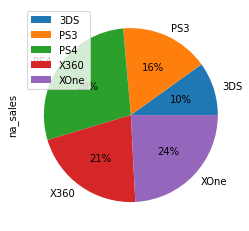

In [53]:
na_platform_sales.query( # построим круговую диаграмму для продаж игр на популярных платформах в Северной Америке
    'platform in ["PS4", "XOne", "X360", "PS3", "3DS"]'
).plot(kind='pie', y='na_sales', autopct='%1.0f%%', labels=na_platform_sales.query(
    'platform in ["PS4", "XOne", "X360", "PS3", "3DS"]' # передадим срез ещё и в параметр labels, для корректной подписи 
)['platform'])
plt.show()

In [54]:
eu_platform_sales = df_filtred.groupby(['platform'], as_index=False).agg({'eu_sales': 'sum'})
eu_platform_sales.sort_values(by='eu_sales', ascending=False).head()

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


Проанализировав продажи в Европе, можно отметить, что самыми популярными платформами там являются: PS4, PS3, XOne, X360, 3DS.

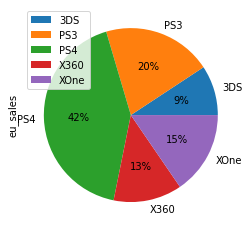

In [55]:
eu_platform_sales.query( # построим круговую диаграмму для продаж игр на популярных платформах в Европе
    'platform in ["PS4", "PS3", "XOne", "X360", "3DS"]'
).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', labels=eu_platform_sales.query(
    'platform in ["PS4", "PS3", "XOne", "X360", "3DS"]'
)['platform'])
plt.show()

In [56]:
jp_platform_sales = df_filtred.groupby('platform', as_index=False).agg({'jp_sales': 'sum'})
jp_platform_sales.sort_values(by='jp_sales', ascending=False).head()

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


Изучив продажи в Японии, можно сказать, что самыми популярными платформами там являются: 3DS, PS3, PSV, PS4, WiiU.

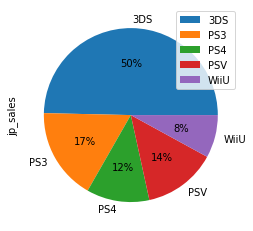

In [57]:
jp_platform_sales.query( # построим круговую диаграмму для продаж игр на популярных платформах в Японии
    'platform in ["3DS", "PS3", "PSV", "PS4", "WiiU"]'
).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', labels=jp_platform_sales.query(
    'platform in ["3DS", "PS3", "PSV", "PS4", "WiiU"]'
)['platform'])
plt.show()

Изучив данные о трех регионах можно отметить, что Япония выделяется на общем фоне сильным преобладанием одного типа платформы - 3DS. Продажи игр на этой платформе составляют половину от общего для топа популярных платформ (50%). Для Европы и Северной Америки характерно распределение долей среди популярных платформ от четверти до трети общего объёма. Там самая популярная платформа PS4 приносит 42% и 28% соответсвенно.

#### Найдём самые популярные жанры для жителей каждого региона.

In [58]:
df_filtred.head() # выведем первые 5 строчек датафрейма для удобства обращения к данным

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Аналогично предыдущему пункту, сгруппируем данные по жанру и посчитаем суммарные продажи для каждого региона отдельно. Результат отсортируем по убыванию.

In [59]:
na_genre_sales = df_filtred.groupby(['genre'], as_index=False).agg({'na_sales': 'sum'})
na_genre_sales.sort_values(by='na_sales', ascending=False).head() # найдём популярные жанры для Северной Америки

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [60]:
eu_genre_sales = df_filtred.groupby(['genre'], as_index=False).agg({'eu_sales': 'sum'})
eu_genre_sales.sort_values(by='eu_sales', ascending=False).head() # найдём популярные жанры для Европы

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [61]:
jp_genre_sales = df_filtred.groupby(['genre'], as_index=False).agg({'jp_sales': 'sum'})
jp_genre_sales.sort_values(by='jp_sales', ascending=False).head() # найдём популярные жанры для Японии

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


Проанализировав данные, можно отметить, что:
- в Северной Америке и Европе преобладают одни и те же жанры в топе продаж;
- Япония сильно отличается от Европы и Америки специфичными жанрами, преобладающими в продажах игр, что может быть связано с культурными различиями между странами;
- рынок Европы и Америки является более прибыльным для издателей игр.

#### Оценим влияние рейтинга ESRB на продажи на примере рынка Северной Америки.

In [62]:
na_rating_sales = df_filtred.query('rating!="empty"').groupby(['rating'], as_index=False).agg({'na_sales': 'sum'})
na_rating_sales.sort_values(by='na_sales', ascending=False) # с помощью среза уберем игры без рейтинга

,rating,na_sales
2,M,165.21
0,E,79.05
1,E10+,54.24
3,T,49.79


In [63]:
eu_rating_sales = df_filtred.query('rating!="empty"').groupby(['rating'], as_index=False).agg({'eu_sales': 'sum'})
eu_rating_sales.sort_values(by='eu_sales', ascending=False) # с помощью среза уберем игры без рейтинга

,rating,eu_sales
2,M,145.32
0,E,83.36
1,E10+,42.69
3,T,41.95


In [64]:
jp_rating_sales = df_filtred.query('rating!="empty"').groupby(['rating'], as_index=False).agg({'jp_sales': 'sum'})
jp_rating_sales.sort_values(by='jp_sales', ascending=False) # с помощью среза уберем игры без рейтинга

,rating,jp_sales
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


In [65]:
other_rating_sales = df_filtred.query('rating!="empty"').groupby(['rating'], as_index=False).agg({'other_sales': 'sum'})
other_rating_sales.sort_values(by='other_sales', ascending=False) # с помощью среза уберем игры без рейтинга

,rating,other_sales
2,M,47.04
0,E,22.61
3,T,14.29
1,E10+,12.57


Таким образом, можно отметить, что игры с рейтингом 18+ лидируют в топе продаж Северной Америки и Европы. Похожая ситуация наблюдается и в остальных регионах. В Японии преобладают игры рейтинга T (для лиц от 13 лет), что скорее всего связано с популярностью определенных жанров в данном регионе.

### Проверка гипотез.

In [66]:
df_filtred.head() # выведем первые 5 строчек датафрейма для удобства обращения к данным

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,empty,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,empty,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


#### Сравнение средних пользовательские рейтинги платформ Xbox One и PC.

Сформируем нулевую и альтернативную гипотезы.

* H0 - средние пользовательские рейтинги платформ Xbox One и PC примерно равны;
* H1 - средние пользовательские рейтинги платформ Xbox One и PC значимо отличаются друг от друга.

In [67]:
alpha = 0.05 # уровень статистической значимости

In [68]:
xone_rating = df_filtred.query('platform == "XOne"')['user_score'].dropna() # сделаем срезы по нужным платформам,
pc_rating = df_filtred.query('platform == "PC"')['user_score'].dropna() # убрав nan значения

Проверим двустороннюю гипотезу для средних двух генеральных совокупностей.

In [69]:
results_1 = st.ttest_ind(xone_rating, pc_rating)
print('p-значение:', results_1.pvalue)
if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-значение: 0.14012658403611647
Нет оснований отвергнуть нулевую гипотезу


Таким образом, средние пользовательские рейтинги двух платформ действительно практически одинаковые. Убедимся в этом, посчитав среднее значение для каждой платформы.

In [70]:
mean_xone_rating = df_filtred.query('platform == "XOne"')['user_score'].mean() # сделаем срезы по нужным платформам
mean_pc_rating = df_filtred.query('platform == "PC"')['user_score'].mean() # и найдём средние рейтинги игр для них
print(f'Средний пользовательский рейтинг игр на Xbox: {mean_xone_rating:.2f}')
print(f'Средний пользовательский рейтинг игр на PC: {mean_pc_rating:.2f}')

Средний пользовательский рейтинг игр на Xbox: 6.52
Средний пользовательский рейтинг игр на PC: 6.27


#### Сравнение средних пользовательских рейтингов жанров Action и Sports.

Сформируем нулевую и альтернативную гипотезы.

* H0 - средние пользовательские рейтинги жанров Action и Sports значимо различаются;
* H1 - средние пользовательские рейтинги жанров Action и Sports не различаются значимо.

In [71]:
action_rating = df_filtred.query('genre == "Action"')['user_score'].dropna() # сделаем срезы по нужным жанрам,
sports_rating = df_filtred.query('genre == "Sports"')['user_score'].dropna() # убрав nan значения

Проверим двустороннюю гипотезу для средних двух генеральных совокупностей.

In [72]:
results_2 = st.ttest_ind(action_rating, sports_rating)
print('p-значение:', results_2.pvalue)
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Таким образом, средние пользовательские рейтинги для двух жанров значимо различаются друг от друга. Проверим это, посчитав среднее значение для каждого жанра.

In [73]:
mean_action_rating = df_filtred.query('genre == "Action"')['user_score'].mean() # сделаем срезы по нужным платформам
mean_sports_rating = df_filtred.query('genre == "Sports"')['user_score'].mean() # и найдём средние рейтинги игр для них
print(f'Средний пользовательский рейтинг игр жанра Action: {mean_action_rating:.2f}')
print(f'Средний пользовательский рейтинг игр жанра Sports: {mean_sports_rating:.2f}')

Средний пользовательский рейтинг игр жанра Action: 6.84
Средний пользовательский рейтинг игр жанра Sports: 5.24


*Примечание:*
- при выдвижении гипотез для данных тестов мы охватывали всё пространство исходов. Так, для первого случая, нулевая гипотеза проверяла конкретный исход, а альтернативная - исходы большего и меньшего значений рейтинга платформ. Во втором случае - наоборот, нулевая гипотеза проверяла основной объём исходов, а альтернативная - конкретный.
- для проверки гипотез был выбран двухвыборочный t-тест для независимых выборок, так как данные не претерпевали изменений.

### Выводы

В данной работе было проведено исследование продаж видеоигр в интернет-магазине «Стримчик». Произведена загрузка полученного датасета на 16715 строк, его предобработка и последующий анализ. 

В результате анализа были выявлены следующие закономерности:
- самые популярные платформы по всем регионам - PS4, XOne, 3DS, PC;
- новые платформы появляются и исчезают примерно раз в 9-11 лет;
- наибольшие продажи имею платформы - PS4, PS3, XOne, 3DS, X360;
- за последний рассмотренный год продажи по всем платформам снизились примерно одинаково. Тем не менее, до 2016 года, наблюдался рост продаж на новых платформах: PS4, XOne. Их можно назвать наиболее преспективными;
- зависимость продаж от оценок критиков или пользователей незначительна, либо равна нулю;
- наибольшее количество проектов можно выделить среди следующих жанров: Action, Role-Playing, Adventure, Sports;
- в топ самых продаваемых жанров входят: Action, Shooter, Role-Playing, Sports;
- Япония выделяется на общем фоне среди других регионов сильным преобладанием одного типа платформы - 3DS (50% продаж), в Европе и Северной Америке лидируют playstation и xbox четвертого и третьего поколений;
- Япония сильно отличается от Европы и Америки специфичными жанрами, преобладающими в продажах игр, что может быть связано с культурными различиями между странами;
- рынок Европы и Америки является более прибыльным для издателей игр;
- выявлено, что игры с рейтингом 18+ лидируют в топе продаж в большинстве регионов, кроме Японии (там лидирует рейтинг 13+);

На завершающем этапе были сформулированы 2 гипотезы о равенстве рейтингов игр на двух платформах и в двух выбранных жанрах. После проведенного анализа, отметим, что:
* средние пользовательские рейтинги двух платформ (Xbox One и PC) действительно практически одинаковые;
* средние пользовательские рейтинги для двух жанров (Action и Sports) значимо различаются друг от друга.

Подводя итог, отметим, что для успешного планирования рекламной компании на 2017-й год необходимо учитывать платформу, для которой будет рекламироваться игра, стоит выбрать популярный жанр опираясь на региональные особенности продаж (для большинства регионов в продажах лидируют игры с рейтингом 18+ в жанрах Action, Shooter, Sports) и количество платформодержателей.